In [1]:
#%pip install tabulate
from tabulate import tabulate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score
from sklearn.decomposition import PCA, KernelPCA

from qiskit import BasicAer, Aer
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.datasets import ad_hoc_data

from sklearn.kernel_approximation import Nystroem
from sklearn.utils import shuffle

#from utils import feature_list, u2Reuploading

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

import sys

In [2]:
feature_list = [
    'p_T Jet1',
    '\eta Jet1',
    '\phi Jet1',
    'E Jet1',
    'p_x Jet1',
    'p_y Jet1',
    'p_z Jet1',
    'b tag Jet1',
    'p_T Jet2',
    '\eta Jet2',      
    '\phi Jet2',    
    'E Jet2',
    'p_x Jet2',
    'p_y Jet2',
    'p_z Jet2',
    'b tag Jet2',
    'p_T Jet3',
    '\eta Jet3',
    '\phi Jet3',
    'E Jet3',
    'p_x Jet3',
    'p_y Jet3',
    'p_z Jet3', 
    'b tag Jet3',
    'p_T Jet4',
    '\eta Jet4',
    '\phi Jet4',
    'E Jet4',
    'p_x Jet4',
    'p_y Jet4',
    'p_z Jet4',
    'b tag Jet4',
    'p_T Jet5',
    '\eta Jet5',
    '\phi Jet5',
    'E Jet5',
    'p_x Jet5',
    'p_y Jet5',
    'p_z Jet5',
    'b tag Jet5',
    'p_T Jet6',
    '\eta Jet6',
    '\phi Jet6',
    'E Jet6',
    'p_x Jet6',
    'p_y Jet6',
    'p_z Jet6',
    'b tag Jet6',
    'p_T Jet7',
    '\eta Jet7',
    '\phi Jet7',
    'E Jet7',
    'p_x Jet7',
    'p_y Jet7',
    'p_z Jet7',
    'b tag Jet7',
    '\phi MET',
    'p_x MET',
    'p_y MET',
    'p_z MET',
    'p_T Lepton',
    '\eta Lepton',
    '\phi Lepton',
    'E Lepton',
    'p_x Lepton',
    'p_y Lepton',
    'p_z Lepton'
    
]


from qiskit.circuit import QuantumCircuit, ParameterVector
import numpy as np


def u2Reuploading(nqubits=8, nfeatures=16) -> QuantumCircuit:
    """
    Constructs the u2Reuploading feature map.
    @nqubits   :: Int number of qubits used.
    @nfeatures :: Number of variables in the dataset to be processed.
    returns :: The quantum circuit object form qiskit.
    """
    x = ParameterVector("x", nfeatures) #(name,length)
    qc = QuantumCircuit(nqubits)
    for feature, qubit in zip(range(0, 2 * nqubits, 2), range(nqubits)):
        qc.u(
            np.pi / 2, x[feature], x[feature + 1], qubit
        )  # u2(φ,λ) = u(π/2,φ,λ)
    for i in range(nqubits):
        if i == nqubits - 1:
            break
        qc.cx(i, i + 1)
    for feature, qubit in zip(range(2 * nqubits, nfeatures, 2), range(nqubits)):
        qc.u(np.pi / 2, x[feature], x[feature + 1], qubit)

    for feature, qubit in zip(range(0, 2 * nqubits, 2), range(nqubits)):
        qc.u(x[feature], x[feature + 1], 0, qubit)

    return qc

In [3]:
from time import time
CMAT_PATH = 'C:/Users/Yasmin/Documents/DSSC/QC/cmat'

seed = 12345

backend = QuantumInstance(BasicAer.get_backend("statevector_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed)

In [8]:
data_path = 'C:/Users/Yasmin/Documents/DSSC/QC/QSVMproject/'
data = np.load(f"{data_path}x_data_normalized.npy")
data = shuffle(data)

n_c = 16
C_SVM_SAMPLES = 10000
Q_SVM_SAMPLES = 500
PREDICTIONS = 500

FEATURES = [32, 24, 40, 16, 8, 0, 48, 3, 51, 11, 19, 43, 27, 35, 57, 47]

PROBA = True

#encoders = ['auc','pca','nys']
encoders = ['nys']

x_train = data[:int(0.8*len(data)),:-1]
y_train = data[:int(0.8*len(data)),-1]

x_test = data[int(0.8*len(data)):,:-1]
y_test = data[int(0.8*len(data)):,-1]

bg_train = np.where(y_train[:PREDICTIONS] == 0)
sig_train = np.where(y_train[:PREDICTIONS] == 1)
bg_test = np.where(y_test[:PREDICTIONS] == 0)
sig_test = np.where(y_test[:PREDICTIONS] == 1) 

In [9]:
zz = ZZFeatureMap(feature_dimension=n_c, reps=2, entanglement='linear')
u2 = u2Reuploading(nqubits = n_c//2, nfeatures=n_c)
xy = PauliFeatureMap(feature_dimension=n_c, reps=2, paulis=['XY'],entanglement = 'linear')

f_maps = ['zz','u2','xy']
#f_maps = ['xy']
#xy.draw('mpl')

running experiment with: 
	 classical svm samples 10000 
	 Quantum SVM samples 500
running classical svm w. encoder nys
	 training time:  24.80
	 prediction time training set:  0.12
	 prediction time test set:  0.13
		 CALCULATING ROC AUC SCORES: this may take some time
		 Classical svm ROC AUC score TRAINING SET 0.73
		 Classical svm ROC AUC score TEST SET 0.64


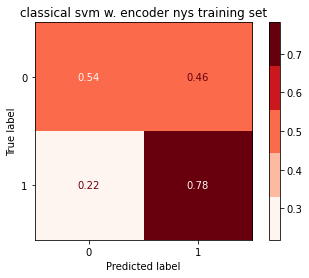

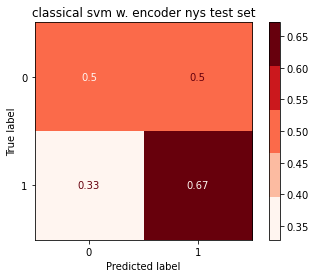

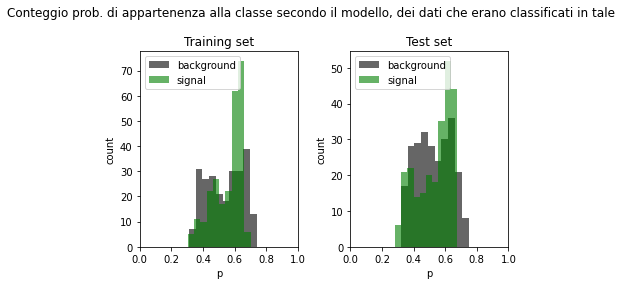

In [10]:
print(f"running experiment with: \n\t classical svm samples {C_SVM_SAMPLES} \n\t Quantum SVM samples {Q_SVM_SAMPLES}")

#qui faccio la trasformata
for encoder in encoders:
    if encoder == 'pca':
        transformer = PCA(n_components= n_c)
        transformer.fit(x_train)
        x_tf_train = transformer.transform(x_train)
        x_tf_test = transformer.transform(x_test)
    if encoder == 'nys':       
        transformer = Nystroem(kernel='laplacian',gamma=0.2,n_components=n_c)
        transformer.fit(x_train,y_train)
        x_tf_train = transformer.transform(x_train)
        x_tf_test = transformer.transform(x_test)
    if encoder == 'auc':
        x_tf_train = x_train[:,FEATURES]
        x_tf_test = x_test[:,FEATURES]
        x_tf_train = x_tf_train[:,:n_c] #se n_c = 8 riduco ancora
        x_tf_test = x_tf_test[:,:n_c]

    #declaring svm object
    svm = SVC(kernel = 'rbf', probability=PROBA)
    print(f"running classical svm w. encoder {encoder}")
    
    begin = time()
    svm.fit(x_tf_train[:C_SVM_SAMPLES], y_train[:C_SVM_SAMPLES]) #TRONCO UNA PARTE DI DATI? Sì, prendo 10^4
    end = time()
    print(f"\t training time: {end - begin : .2f}")

    '''predictions and confusion matrix, TRAINING set''' #predict anche qui to see se overfitta
    begin = time()
    y_pred_train_cl= svm.predict(x_tf_train[:PREDICTIONS]) 
    end = time()
    print(f"\t prediction time training set: {end - begin : .2f}")

    classic_cmap = plt.get_cmap('Reds', 5)
    cm = confusion_matrix(y_train[:PREDICTIONS],y_pred_train_cl, normalize='true')
    disp = ConfusionMatrixDisplay(cm) #SI SISTEMA LA NORMALIZZAZIONE DI COLORBAR
    disp.plot(cmap=classic_cmap)
    plt.title(f"classical svm w. encoder {encoder} training set")
    plt.savefig(f"{CMAT_PATH}classical_{encoder}_train.jpg")

    
    #'''predictions and confusion matrix, TEST set'''
    begin = time()
    y_pred_test_cl = svm.predict(x_tf_test[:PREDICTIONS])
    end = time()
    print(f"\t prediction time test set: {end - begin : .2f}")
    
    cm = confusion_matrix(y_test[:PREDICTIONS],y_pred_test_cl, normalize='true')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=classic_cmap)
    plt.title(f"classical svm w. encoder {encoder} test set")
    plt.savefig(f"{CMAT_PATH}classical_{encoder}_test.jpg")
   
    #con predict proba ottengo come output non classe ma probailità di appartenentza a classe
    #(assegnazione a una classe del modello) y_proba = matrix NX2
    if PROBA:
        print(f"\t\t CALCULATING ROC AUC SCORES: this may take some time")
        y_proba_train_cl = svm.predict_proba(x_tf_train[:PREDICTIONS])
        #calcolo l'AUC per classe
        score = roc_auc_score(y_train[:PREDICTIONS], y_proba_train_cl[:,1]) #
        print(f"\t\t Classical svm ROC AUC score TRAINING SET {score:.2f}")

        y_proba_test_cl = svm.predict_proba(x_tf_test[:PREDICTIONS])
        score = roc_auc_score(y_test[:PREDICTIONS], y_proba_test_cl[:,1])
        print(f"\t\t Classical svm ROC AUC score TEST SET {score:.2f}")
    
    '''
    distribuzioni classiche
    '''
    #array con i valori di prob che modello assegna a osservazioni che sono background effettivamente
    bg_proba_train_cl  = y_proba_train_cl[bg_train] 
    sig_proba_train_cl = y_proba_train_cl[sig_train] 
    bg_proba_test_cl  = y_proba_test_cl[bg_test] 
    sig_proba_test_cl = y_proba_test_cl[sig_test] 
         
    #axs[0].sharey(axs[1])
    fig,axs = plt.subplots(1,2,sharey=False, tight_layout=True)
    fig.suptitle("Conteggio prob. di appartenenza alla classe secondo il modello, dei dati che erano classificati in tale") #Y

    #estetica
    axs[0].set_xlabel('p'),     axs[1].set_xlabel('p')
    axs[0].set_ylabel('count'), axs[1].set_ylabel('count')
    axs[0].set_xlim(0,1), axs[1].set_xlim(0,1)    
    #axs[0].set_yticks([]), axs[1].set_yticks([])

    axs[0].set_title('Training set')
    axs[0].hist(bg_proba_train_cl[:,0], alpha=0.6, label='background', color='black')
    axs[0].hist(sig_proba_train_cl[:,1], alpha=0.6, label='signal', color='green')

    axs[1].set_title('Test set')
    axs[1].hist(bg_proba_test_cl[:,0], alpha=0.6, label='background', color='black')
    axs[1].hist(sig_proba_test_cl[:,1], alpha=0.6, label='signal', color='green')

    axs[0].legend(loc='upper left'), axs[1].legend(loc='upper left')
    plt.show()


running quantum svm w. encoder NYS feature map ZZ
	 training time:  169.27
	 prediction time training set:  169.03
	 prediction time test set:  331.16
		 CALCULATING ROC AUC SCORES: this may take some time
		 Quantum svm ROC AUC score TRAINING SET 0.71
		 Quantum svm ROC AUC score TEST SET 0.62


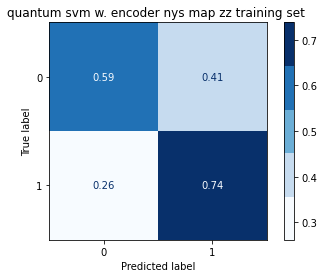

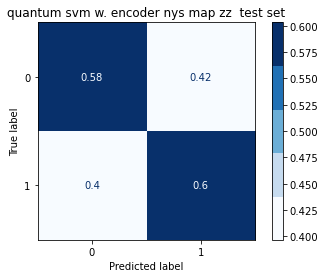

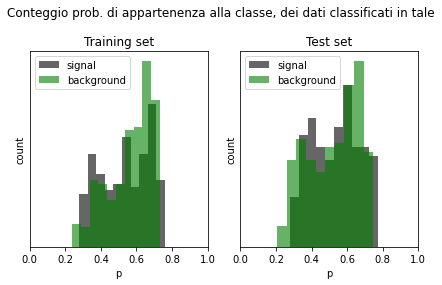

running quantum svm w. encoder NYS feature map U2
	 training time:  3.99
	 prediction time training set:  3.89
	 prediction time test set:  7.74
		 CALCULATING ROC AUC SCORES: this may take some time
		 Quantum svm ROC AUC score TRAINING SET 0.39
		 Quantum svm ROC AUC score TEST SET 0.43


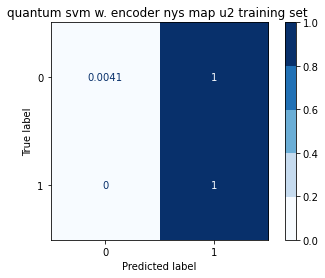

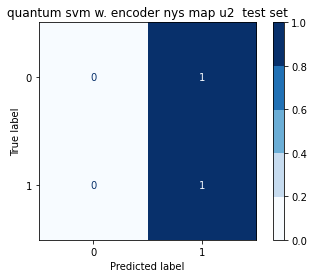

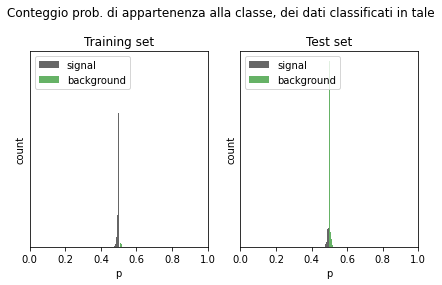

running quantum svm w. encoder NYS feature map XY
	 training time:  161.49
	 prediction time training set:  162.01
	 prediction time test set:  332.75
		 CALCULATING ROC AUC SCORES: this may take some time
		 Quantum svm ROC AUC score TRAINING SET 0.73
		 Quantum svm ROC AUC score TEST SET 0.62


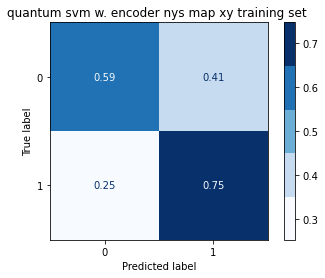

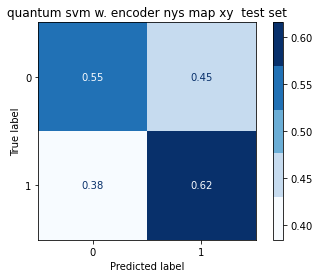

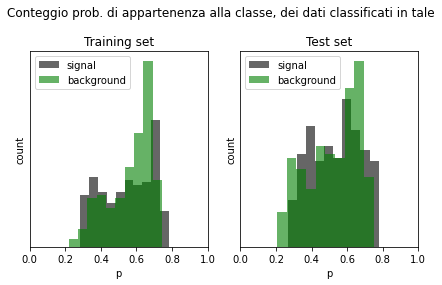

In [11]:
    """
    Quantum computing part
    """
    #ATTENZIONE A NON USARE X_TRAIN TRASFORMATOOOOOO (???)
    for feature_map in f_maps:
        if feature_map == 'u2':
            kernel = QuantumKernel(feature_map=u2 , quantum_instance=backend)
        if feature_map == 'zz':
            kernel = QuantumKernel(feature_map=zz , quantum_instance=backend)
        if feature_map == 'xy':
            kernel = QuantumKernel(feature_map=xy , quantum_instance=backend)
            
        #declaring Qsvm object
        qsvm = SVC(kernel=kernel.evaluate, probability=PROBA)
        print(f"running quantum svm w. encoder {encoder.upper()} feature map {feature_map.upper()}")


        begin = time()
        qsvm.fit(x_tf_train[:Q_SVM_SAMPLES], y_train[:Q_SVM_SAMPLES])#ANCHE QUI, TRONCO DATI?
        end = time()
        print(f"\t training time: {end - begin : .2f}")

        #'''predictions and confusion matrix, TRAINING set''' #faccio predict anche qui to see se overfitta        
        begin = time()
        y_pred_train_q= qsvm.predict(x_tf_train[:PREDICTIONS])
        end = time()
        print(f"\t prediction time training set: {end - begin : .2f}")

        quantum_cmap = plt.get_cmap('Blues', 5)
        cm = confusion_matrix(y_train[:PREDICTIONS],y_pred_train_q, normalize='true')
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap=quantum_cmap)        
        plt.title(f"quantum svm w. encoder {encoder} map {feature_map} training set ")
        plt.savefig(f"{CMAT_PATH}quantum_{encoder}_{feature_map}_train.jpg")
    
        #'''predictions and confusion matrix, TEST set'''
        begin = time()
        y_pred_test_q= qsvm.predict(x_tf_test[:PREDICTIONS])
        end = time()
        print(f"\t prediction time test set: {end - begin : .2f}")

        cm = confusion_matrix(y_test[:PREDICTIONS],y_pred_test_q, normalize= 'true')
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap=quantum_cmap)
        plt.title(f"quantum svm w. encoder {encoder} map {feature_map}  test set")
        plt.savefig(f"{CMAT_PATH}quantum_{encoder}_{feature_map}_test.jpg")

        if PROBA:
            print(f"\t\t CALCULATING ROC AUC SCORES: this may take some time")
            
            y_proba_train_q= qsvm.predict_proba(x_tf_train[:PREDICTIONS])
            score = roc_auc_score(y_train[:PREDICTIONS], y_proba_train_q[:,1])
            print(f"\t\t Quantum svm ROC AUC score TRAINING SET {score :.2f}")

            y_proba_test_q= qsvm.predict_proba(x_tf_test[:PREDICTIONS])
            score = roc_auc_score(y_test[:PREDICTIONS], y_proba_test_q[:,1])
            print(f"\t\t Quantum svm ROC AUC score TEST SET {score :.2f}")
            
        '''
        distribuzioni quantistiche
        '''
        bg_proba_train_q  = y_proba_train_q[bg_train] 
        sig_proba_train_q = y_proba_train_q[sig_train] 
        bg_proba_test_q  = y_proba_test_q[bg_test] 
        sig_proba_test_q = y_proba_test_q[sig_test] 

        #axs[0].sharey(axs[1])
        fig, axs = plt.subplots(1,2,sharey=False, tight_layout=True)
        fig.suptitle("Conteggio prob. di appartenenza alla classe, dei dati classificati in tale")

        #estetica
        axs[0].set_xlabel('p'), axs[1].set_xlabel('p')
        axs[0].set_ylabel('count'), axs[1].set_ylabel('count')
        axs[0].set_xlim(0,1), axs[1].set_xlim(0,1)
        axs[0].set_yticks([]), axs[1].set_yticks([])

        axs[0].set_title('Training set')
        axs[0].hist(bg_proba_train_q[:,0], alpha=0.6, label='signal', color='black')
        axs[0].hist(sig_proba_train_q[:,1], alpha=0.6, label='background', color='green')

        axs[1].set_title('Test set')
        axs[1].hist(bg_proba_test_q[:,0], alpha=0.6, label='signal', color='black')
        axs[1].hist(sig_proba_test_q[:,1], alpha=0.6, label='background', color='green')

        axs[0].legend(loc='upper left'), axs[1].legend(loc='upper left')
        plt.show()      

In [ ]:
table = [['Encoder', 'Modello', 'AUC training', 'AUC test', 'T.C. training', 'T.C. test'],['AUC', 'RBF', 0.69, 0.65, 0.25, 0.25],
        ['AUC','U2',0.66, 0.63, 6.4, 15.3],['AUC','ZZ',0.99,0.59,335.0,669.7]]

In [ ]:
'''
nella presentazione mettere le mappette latex delle feature maps
abbiamo usato solo il radial kernekl classico
parlare della matrice Nx2 (p,1-p)
'''

In [ ]:
#cella classica e quantistica unite
print(f"running experiment with: \n\t classical svm samples {C_SVM_SAMPLES} \n\t Quantum SVM samples {Q_SVM_SAMPLES}")

#qui faccio la trasformata
for encoder in encoders:
    if encoder == 'pca':
        transformer = PCA(n_components= n_c)
        transformer.fit(x_train)
        x_tf_train = transformer.transform(x_train)
        x_tf_test = transformer.transform(x_test)
    if encoder == 'nys':       
        transformer = Nystroem(kernel='laplacian',gamma=0.2,n_components=n_c)
        transformer.fit(x_train,y_train)
        x_tf_train = transformer.transform(x_train)
        x_tf_test = transformer.transform(x_test)
    if encoder == 'auc':
        x_tf_train = x_train[:,FEATURES]
        x_tf_test = x_test[:,FEATURES]
        x_tf_train = x_tf_train[:,:n_c]
        x_tf_test = x_tf_test[:,:n_c]

    #declaring svm object
    svm = SVC(kernel = 'rbf', probability=PROBA)
    print(f"running classical svm w. encoder {encoder}")
    
    #begin = time()
    svm.fit(x_tf_train[:C_SVM_SAMPLES], y_train[:C_SVM_SAMPLES]) #TRONCO UNA PARTE DI DATI? Sì, prendo 10^4
    #end = time()
    #print(f"\t training time: {end - begin : .2f}")

    '''predictions and confusion matrix, TRAINING set''' #predict anche qui to see se overfitta
    #begin = time()
    y_pred_train_cl= svm.predict(x_tf_train[:PREDICTIONS]) 
    #end = time()
    #print(f"\t prediction time training set: {end - begin : .2f}")

    classic_cmap = plt.get_cmap('Reds', 5)
    cm = confusion_matrix(y_train[:PREDICTIONS],y_pred_train_cl, normalize='true')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=classic_cmap)
    plt.title(f"classical svm w. encoder {encoder} training set")
    plt.savefig(f"{CMAT_PATH}classical_{encoder}_train.jpg")

    
    #'''predictions and confusion matrix, TEST set'''
    #begin = time()
    y_pred_test_cl = svm.predict(x_tf_test[:PREDICTIONS])
    #end = time()
    #print(f"\t prediction time test set: {end - begin : .2f}")
    
    cm = confusion_matrix(y_test[:PREDICTIONS],y_pred_test_cl, normalize='true')
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap=classic_cmap)
    plt.title(f"classical svm w. encoder {encoder} test set")
    plt.savefig(f"{CMAT_PATH}classical_{encoder}_test.jpg")
   
    #con predict proba ottengo come output non classe ma probailità di appartenentza a classe
    #(assegnazione a una classe del modello) y_proba = matrix NX2
    if PROBA:
        #print(f"\t\t CALCULATING ROC AUC SCORES: this may take some time")
        y_proba_train_cl = svm.predict_proba(x_tf_train[:PREDICTIONS])
        #calcolo l'AUC per classe
        score = roc_auc_score(y_train[:PREDICTIONS], y_proba_train_cl[:,0])#PERCHÈ QUI È ZERO?
        #print(f"\t\t Classical svm ROC AUC score TRAINING SET {max(score,1 - score) :.2f}")

        y_proba_test_cl = svm.predict_proba(x_tf_test[:PREDICTIONS])
        score = roc_auc_score(y_test[:PREDICTIONS], y_proba_test_cl[:,0])#E QUI È 1 NELLA versione nuova
        #print(f"\t\t Classical svm ROC AUC score TEST SET {max(score,1 - score):.2f}")
    
    '''
    distribuzioni classiche
    '''
    #array con i valori di prob che modello assegna a osservazioni che sono background effettivamente
    bg_proba_train_cl  = y_proba_train_cl[bg_train] 
    sig_proba_train_cl = y_proba_train_cl[sig_train] 
    bg_proba_test_cl  = y_proba_test_cl[bg_test] 
    sig_proba_test_cl = y_proba_test_cl[sig_test] 
         
    #fig, axs = plt.subplots(1,2,sharey=True, tight_layout=True)
    #axs[0].sharey(axs[1])
    fig,axs = plt.subplots(1,2,sharey=False, tight_layout=True)
    fig.suptitle("Conteggio prob. di appartenenza alla classe secondo il modello, dei dati che erano classificati in tale") #Y

    #estetica
    axs[0].set_xlabel('p'),     axs[1].set_xlabel('p')
    axs[0].set_ylabel('count'), axs[1].set_ylabel('count')
    #axs[0].set_xlim(0.2,0.8), axs[1].set_xlim(0.2,0.8)
    #axs[0].set_yticks([]), axs[1].set_yticks([])

    axs[0].set_title('Training set')
    axs[0].hist(bg_proba_train_cl[:,0], alpha=0.6, label='background', color='black')
    axs[0].hist(sig_proba_train_cl[:,1], alpha=0.6, label='signal', color='green')

    axs[1].set_title('Test set')
    axs[1].hist(bg_proba_test_cl[:,0], alpha=0.6, label='background', color='black')
    axs[1].hist(sig_proba_test_cl[:,1], alpha=0.6, label='signal', color='green')

    axs[0].legend(loc='upper left'), axs[1].legend(loc='upper left')
    plt.show()        
    """
    Quantum computing part
    """
    #ATTENZIONE A NON USARE X_TRAIN TRASFORMATOOOOOO (???)
    for feature_map in f_maps:
        if feature_map == 'u2':
            kernel = QuantumKernel(feature_map=u2 , quantum_instance=backend)
        if feature_map == 'zz':
            kernel = QuantumKernel(feature_map=zz , quantum_instance=backend)

            
        #declaring Qsvm object
        qsvm = SVC(kernel=kernel.evaluate, probability=PROBA)
        print(f"running quantum svm w. encoder {encoder.upper()} feature map {feature_map.upper()}")


        #begin = time()
        qsvm.fit(x_tf_train[:Q_SVM_SAMPLES], y_train[:Q_SVM_SAMPLES])#ANCHE QUI, TRONCO DATI?
        #end = time()
        #print(f"\t training time: {end - begin : .2f}")

        #'''predictions and confusion matrix, TRAINING set''' #faccio predict anche qui to see se overfitta        
        #begin = time()
        y_pred_train_q= qsvm.predict(x_tf_train[:PREDICTIONS])
        #end = time()
        #print(f"\t prediction time training set: {end - begin : .2f}")

        quantum_cmap = plt.get_cmap('Blues', 5)
        cm = confusion_matrix(y_train[:PREDICTIONS],y_pred_train_q, normalize='true')
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap=quantum_cmap)        
        plt.title(f"quantum svm w. encoder {encoder} map {feature_map} training set ")
        plt.savefig(f"{CMAT_PATH}quantum_{encoder}_{feature_map}_train.jpg")
    
        #'''predictions and confusion matrix, TEST set'''
        #begin = time()
        y_pred_test_q= qsvm.predict(x_tf_test[:PREDICTIONS])
        #end = time()
        #print(f"\t prediction time test set: {end - begin : .2f}")

        cm = confusion_matrix(y_test[:PREDICTIONS],y_pred_test_q, normalize='true')
        disp = ConfusionMatrixDisplay(cm)
        disp.plot(cmap=quantum_cmap)
        plt.title(f"quantum svm w. encoder {encoder} map {feature_map}  test set")
        plt.savefig(f"{CMAT_PATH}quantum_{encoder}_{feature_map}_test.jpg")

        if PROBA:
            print(f"\t\t CALCULATING ROC AUC SCORES: this may take some time")
            
            y_proba_train_q= qsvm.predict_proba(x_tf_train[:PREDICTIONS])
            #score = roc_auc_score(y_train[:PREDICTIONS], y_proba_train_q[:,0])
            #print(f"\t\t Quantum svm ROC AUC score TRAINING SET {max(score,1 - score) :.2f}")

            y_proba_test_q= qsvm.predict_proba(x_tf_test[:PREDICTIONS])
            #score = roc_auc_score(y_test[:PREDICTIONS], y_proba_test_q[:,0])
            #print(f"\t\t Quantum svm ROC AUC score TEST SET {max(score,1 - score) :.2f}")
            
        '''
        distribuzioni quantistiche
        '''
        bg_proba_train_q  = y_proba_train_q[bg_train] 
        sig_proba_train_q = y_proba_train_q[sig_train] 
        bg_proba_test_q  = y_proba_test_q[bg_test] 
        sig_proba_test_q = y_proba_test_q[sig_test] 

        #fig, axs = plt.subplots(1,2,sharey=True, tight_layout=True)
        #axs[0].sharey(axs[1])
        fig, axs = plt.subplots(1,2,sharey=False, tight_layout=True)
        fig.suptitle("Conteggio prob. di appartenenza alla classe, dei dati classificati in tale")

        #estetica
        axs[0].set_xlabel('p'), axs[1].set_xlabel('p')
        axs[0].set_ylabel('count'), axs[1].set_ylabel('count')
        #axs[0].set_xlim(0.2,0.8), axs[1].set_xlim(0.2,0.8)
        #axs[0].set_yticks([]), axs[1].set_yticks([])

        axs[0].set_title('Training set')
        axs[0].hist(bg_proba_train_q[:,0], alpha=0.6, label='signal', color='black')
        axs[0].hist(sig_proba_train_q[:,1], alpha=0.6, label='background', color='green')

        axs[1].set_title('Test set')
        axs[1].hist(bg_proba_test_q[:,0], alpha=0.6, label='signal', color='black')
        axs[1].hist(sig_proba_test_q[:,1], alpha=0.6, label='background', color='green')

        axs[0].legend(loc='upper left'), axs[1].legend(loc='upper left')
        plt.show()